<h1>In this document, we will make a Gaussian Model for Anomaly Detection from scratch.</h1> (Meaning we will not import libraries to directly create gaussian model)

<p>There are two types of datasets with 8 features in each. One dataset has no anomaly and another contains anomaly in it.</p>

Gaussian Model is a probabilistic model. We take the mean and standard deviation of each feature from normal data and calculate the probability of each record of being an anomaly on the basis of a selected threshold value.

We will make three models with different approaches. In first model, we will consider <b>all features</b> to train and test, in second model we will consider only <b>important features</b> and in third approach we will use <b>PCA</b> to perform the same operation.

<b>What are we looking for?</b> : In anomaly detection, the Recall is very important, even more important than Accuracy. This is because, the percentage of an outlier in any dataset is generally very small. And that "very small" amount of anomaly should be detected correctly as well, which is determined by Recall rate. You will see in the models below.

To end this dosument, we will compare the results of all the three approaches on the basis of their Recall, Accuracy, Time complexity and Space complexity

Author: Kopal Soni<br>
E-mail: soni.kopal@gmail.com<br>
LinkedIn: https://www.linkedin.com/in/kopal-soni-72992810b/<br>
Github: https://github.com/ksoni5<br>
Importing the required libraries<br>

<h2>1. All features

In [1]:
import pandas as pd
import math
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
"""
Required functions
"""
class GaussianModel:
    # 
    def __init__(self, means, stds):
        """
        Initialize the values that the user must give in order to instantiate an object
        """
        self.means = means
        self.stds = stds

    def Gaussian_Probability(self, x, mean, std):
        """
        Inputs:
        --------------------------------------------------
        X - A floating point number for a particular value to calculate probability in Gaussian model
        mean - Mean of a feature
        std - Standard Variation of a feature
        --------------------------------------------------
        Outputs:
        --------------------------------------------------
        probability - A floating point number for the probability of the event occuring
        --------------------------------------------------
        """
        z = (x - mean)/std # Z-Score
        return math.exp(-0.5 * (z**2)) / std / math.sqrt(2 * math.pi)
    
    def CalculateProbabilities(self, X):
        """
        Calculates - a DataFrame with a column Probability which consist of probability of values at each row
        --------------------------------------------------
        Inputs:
        --------------------------------------------------
        X - The data we wish to try to predict
        --------------------------------------------------
        Outputs:
        --------------------------------------------------
        Y - The predictions from the model
        --------------------------------------------------
        """
        prob_x = 1
        for i in range(len(X)):
#             print("X = {}, Mean = {}, Std = {}".format(X[i], self.means[i], self.stds[i]))
            prob = self.Gaussian_Probability(X[i], self.means[i], self.stds[i])
            prob_x *= prob
        return prob_x
    
    def Predict(self, X, epsilon):
        """
        Predicts if an input instance is an anomaly or not on the basis of threshold over probability
        --------------------------------------------------
        Inputs:
        --------------------------------------------------
        X - The data we wish to try to predict
        epsilon - The threshold value to decide whether
        --------------------------------------------------
        Outputs:
        --------------------------------------------------
        Y - The predictions from the model
        --------------------------------------------------
        """
        df = pd.DataFrame({})
        for i in range(len(X)):
            values = X.iloc[i,:]
            prob = self.CalculateProbabilities(values)
            if(prob < epsilon):
                df = df.append({"Anomaly" : 1}, ignore_index=True)
            else:
                df = df.append({"Anomaly" : 0}, ignore_index=True)
        return df
    
    def FindAnomaly(self, X, Y):
        """
        Returns - a DataFrame with a column Probability which consist of probability of values at each row
        --------------------------------------------------
        Inputs:
        --------------------------------------------------
        X - The data we wish to try to predict
        Y - Actual output
        --------------------------------------------------
        Outputs:
        --------------------------------------------------
        Y - The predictions of probabilities from the model
        --------------------------------------------------
        """
        assert len(X) == len(Y), "Both parameters must have equal size"
        df = pd.DataFrame({})
        for i in range(len(X)):
            y = Y.iloc[i]
            if (y ==1):
                values = X.iloc[i,:]
                prob = self.CalculateProbabilities(values)
                df = df.append({"Anomaly ": y, 'Probability': prob}, ignore_index=True)
        return df

In [3]:
"""
Datasets
"""
normal = pd.read_csv('Dataset/experiment_normal.csv')
X_train = normal.drop(['Sds_Armed', 'Anomaly_Tag'], axis=1)
Y_train = normal.iloc[:,-1]

anomaly = pd.read_csv('Dataset/experiment_contains_anomalies.csv')
X = anomaly.drop(['Sds_Armed'], axis=1)
X_RF = anomaly.drop(['Sds_Armed', 'Anomaly_Tag'], axis=1)
Y = anomaly.iloc[:,-1]
X_test = anomaly.drop(['Sds_Armed', 'Anomaly_Tag'], axis=1)
Y_test = anomaly.iloc[:,-1]

In [4]:
"""
Analyse the normal data
"""

X_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.42051,0.73265,6.0160,1.4258,0.22390,0.44638,4.9892,1.3106
1,0.41743,0.72691,6.0102,1.4259,0.21750,0.44326,5.0469,1.3243
2,0.41608,0.72337,6.0093,1.4254,0.21875,0.44661,5.0830,1.3227
3,0.41517,0.72154,6.0002,1.4261,0.23488,0.46345,4.9672,1.3509
4,0.41376,0.71773,5.9814,1.4257,0.25363,0.48208,4.8346,1.3580


In [5]:
"""
Analyse the anomaly data
"""

X_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,1.7957,6.1964,508.57,875.40,0.43922,1.5473,57.021,56.914
1,1.7851,6.1508,503.90,867.18,0.43947,1.3525,53.658,58.856
2,1.7760,6.1173,499.62,860.56,0.42528,1.3391,52.551,69.101
3,1.7641,6.0799,494.07,851.51,0.42802,1.3679,51.228,75.935
4,1.7525,6.0333,486.73,840.86,0.40701,1.3128,47.228,72.784


In [6]:
# Mean and Standard Deviation of normal data

mean = X_train.mean()
std = X_train.std()

In [7]:
# Instatiate the class
model = GaussianModel(mean, std)

Now that we have an instance of the Gaussian class we must now retreive the test data and try to make some predictions

In [8]:
# Find the probabilities of the anomalies and try to find a threshold. 
# Here we can consider the mean as a starting point.

normal_anom_probs = model.FindAnomaly(X_test, Y_test)

In [9]:
print(normal_anom_probs.median())
print(normal_anom_probs.mean())

Anomaly        1.000000e+00
Probability    4.077625e-08
dtype: float64
Anomaly        1.000000e+00
Probability    7.409756e-08
dtype: float64


Now we must use the values to predict anomalies

In [10]:
epsilon = 7.409756e-08 #normal_anom_probs.mean()
predict = model.Predict(X_test, epsilon)

In [11]:
#use the confusion matrix to calculate other parameters

print('Accuracy Score: {:.3f}% Recall Score: {:.3f}% Precision: {:.3f}% and F1 Score: {:.3f}%'
      .format(accuracy_score(Y_test, predict)*100, recall_score(Y_test, predict)*100,
             precision_score(Y_test, predict)*100, f1_score(Y_test, predict)*100))


Accuracy Score: 67.481% Recall Score: 60.722% Precision: 24.081% and F1 Score: 34.486%


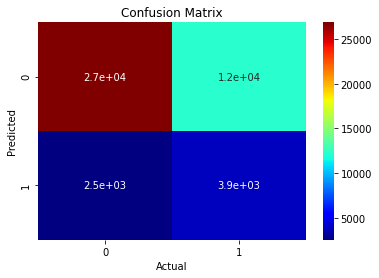

In [12]:
sns.heatmap(confusion_matrix(Y_test, predict), annot=True, cmap="jet")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

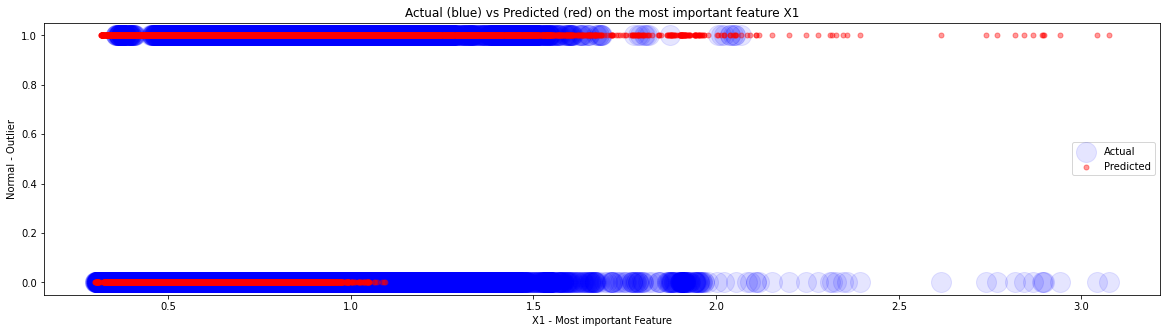

In [13]:
"""
The scatter plot shows the actual vs predicted data points for feature 'X1'
"""

fig = plt.figure(figsize=(20,5))
plt.scatter(X_test.iloc[:,0], Y_test, color="blue", marker='o', s=400 , alpha=0.1, label='Actual')
plt.scatter(X_test.iloc[:,0], predict, color="red", marker='.', s=100, alpha=0.4, label='Predicted')
plt.title("Actual (blue) vs Predicted (red) on the most important feature X1")
plt.xlabel("X1 - Most important Feature")
plt.ylabel("Normal - Outlier")
plt.legend()
plt.show()

<h3><b>Observation:</b> The accuracy and recall are not bad without tuning the threshold but the F1 score isn't acceptable enough. This suggest we either need to tune the threshold or look for another approach.

====================================================================================================================


<h2>2. Important features</h2>
    

First we need to find out the important features in the provided datasets.


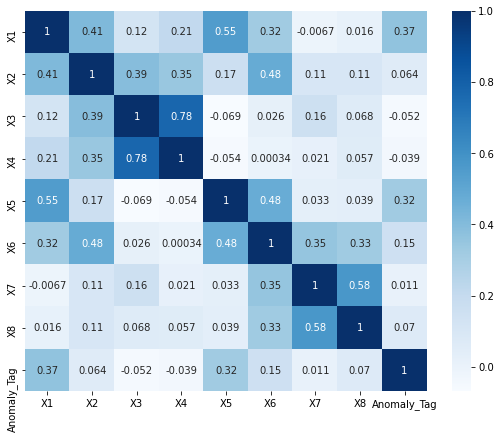

In [14]:
# Let's consider Pearson correlation coefficient for feature importance

coeff = X.corr(method='kendall').index
plt.figure(figsize=(9,7))
sns.heatmap(X[coeff].corr(), annot=True, cmap='Blues')

According to PCC, X1 and X5 seem to be very important features.

Let's also consider Random Forest to determine the rank of each feature to determine their importance.

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X_RF, Y, test_size=0.2, random_state=43)

In [16]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [17]:
rf.score(x_test, y_test)

0.9938636861713784

[0.20245808 0.18240276 0.1466445  0.17031949 0.08114523 0.07040626
 0.06925536 0.07736832]


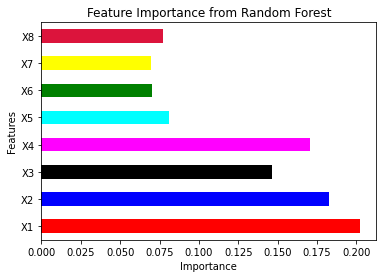

In [18]:
print(rf.feature_importances_)
feature_importance = pd.Series(rf.feature_importances_, index = X_train.columns)
feature_importance.plot(kind='barh', color=['red', 'blue', 'black', 'magenta', 'cyan', 'green', 'yellow', 'crimson'])
plt.title('Feature Importance from Random Forest')
plt.ylabel("Features")
plt.xlabel("Importance")
plt.show()

According to RF Classifier, features X1, X2, X3 and X4 seems to be very important features.

In [19]:
X_RandomF = X_RF[['X1', 'X2', 'X3', 'X4']]

X_PCC = X[['X1', 'X5']]

In [20]:
anomaly_RF = model.FindAnomaly(X_RandomF, Y)
eps_RF = anomaly_RF.mean()
predict_RF = model.Predict(X_RandomF, eps_RF.Probability)

In [21]:
#use the confusion matrix to calculate other parameters for Random Forest

print('Accuracy Score: {:.3f}% Recall Score: {:.3f}% Precision: {:.3f}% and F1 Score: {:.3f}%'
      .format(accuracy_score(Y_test, predict_RF)*100, recall_score(Y_test, predict_RF)*100,
             precision_score(Y_test, predict_RF)*100, f1_score(Y_test, predict_RF)*100))


Accuracy Score: 69.544% Recall Score: 52.527% Precision: 23.754% and F1 Score: 32.714%


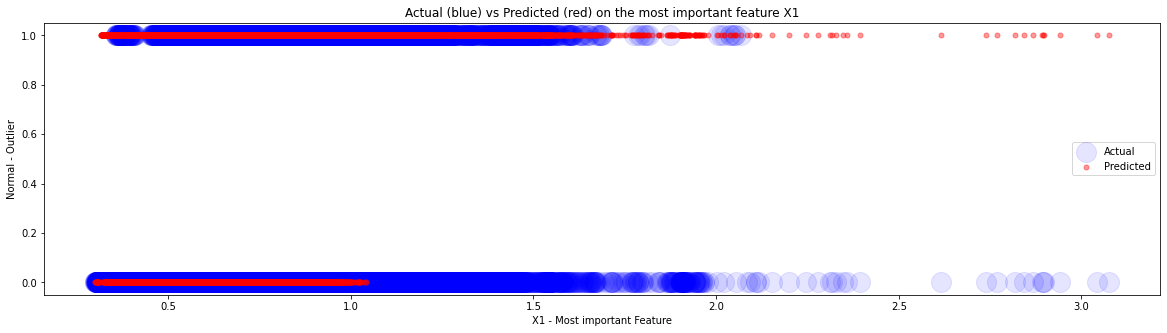

In [22]:
"""
The scatter plot shows the actual vs predicted data points for feature 'X1'
"""
fig = plt.figure(figsize=(20,5))
plt.scatter(X_test.iloc[:,0], Y_test, color="blue", marker='o', s=400 , alpha=0.1, label='Actual')
plt.scatter(X_test.iloc[:,0], predict_RF, color="red", marker='.', s=100, alpha=0.4, label='Predicted')
plt.title("Actual (blue) vs Predicted (red) on the most important feature X1")
plt.xlabel("X1 - Most important Feature")
plt.ylabel("Normal - Outlier")
plt.legend()
plt.show()

In [23]:
anomaly_PCC = model.FindAnomaly(X_PCC, Y)
eps_PCC = anomaly_PCC.mean()
predict_PCC = model.Predict(X_PCC, eps_PCC.Probability)

In [24]:
#use the confusion matrix to calculate other parameters for Random Forest

print('Accuracy Score: {:.3f}% Recall Score: {:.3f}% Precision: {:.3f}% and F1 Score: {:.3f}%'
      .format(accuracy_score(Y_test, predict_PCC)*100, recall_score(Y_test, predict_PCC)*100,
             precision_score(Y_test, predict_PCC)*100, f1_score(Y_test, predict_PCC)*100))

Accuracy Score: 84.176% Recall Score: 37.008% Precision: 42.891% and F1 Score: 39.733%


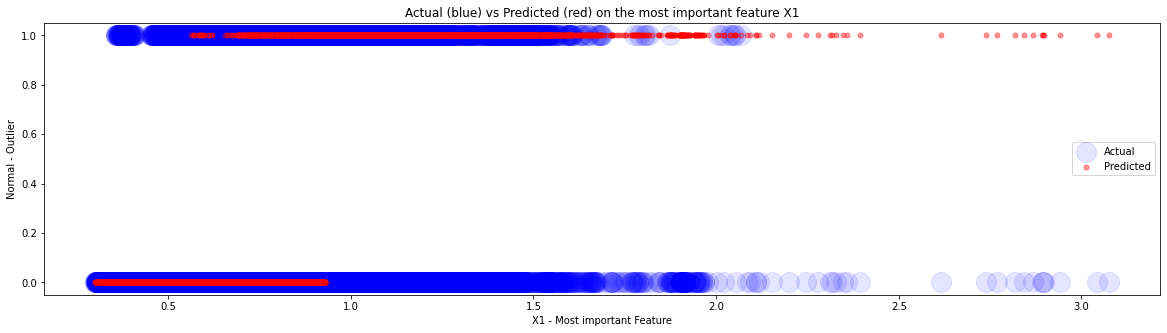

In [25]:
"""
The scatter plot shows the actual vs predicted data points for feature 'X1'
"""
fig = plt.figure(figsize=(20,5))
plt.scatter(X_test.iloc[:,0], Y_test, color="blue", marker='o', s=400 , alpha=0.1, label='Actual')
plt.scatter(X_test.iloc[:,0], predict_PCC, color="red", marker='.', s=100, alpha=0.4, label='Predicted')
plt.title("Actual (blue) vs Predicted (red) on the most important feature X1")
plt.xlabel("X1 - Most important Feature")
plt.ylabel("Normal - Outlier")
plt.legend()
plt.show()

None of the groups of important features performed well considering all the aspects. Let's try dimensionality reduction and evaluate the performance of the model.


    
   ====================================================================================================================


<h2>3. PCA - Dimensionality reduction</h2>
    

In [26]:
# PCA Model
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_test)
pc_test = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

In [27]:
# As ususal we'll call our Gaussian Model
mean_PCA = pc_test.mean()
std_PCA = pc_test.std()
PCA_model = GaussianModel(mean_PCA, std_PCA)

In [28]:
mean_PCA

PC1   -2.565023e-15
PC2    4.083207e-14
dtype: float64

In [29]:
PCA_anomaly = PCA_model.FindAnomaly(pc_test, Y_test)
PCA_predict = PCA_model.Predict(pc_test, PCA_anomaly.mean().Probability)

In [30]:
#use the confusion matrix to calculate other parameters
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score
print("Accuracy Score: {:.3f}% Recall Score: {:.3f}% Precision : {:.3f}% and F1 Score: {:.3f}%"
      .format(accuracy_score(Y_test, PCA_predict)*100, recall_score(Y_test, PCA_predict)*100, 
              precision_score(Y_test, PCA_predict)*100, f1_score(Y_test, PCA_predict)*100))

Accuracy Score: 71.113% Recall Score: 14.259% Precision : 10.684% and F1 Score: 12.215%


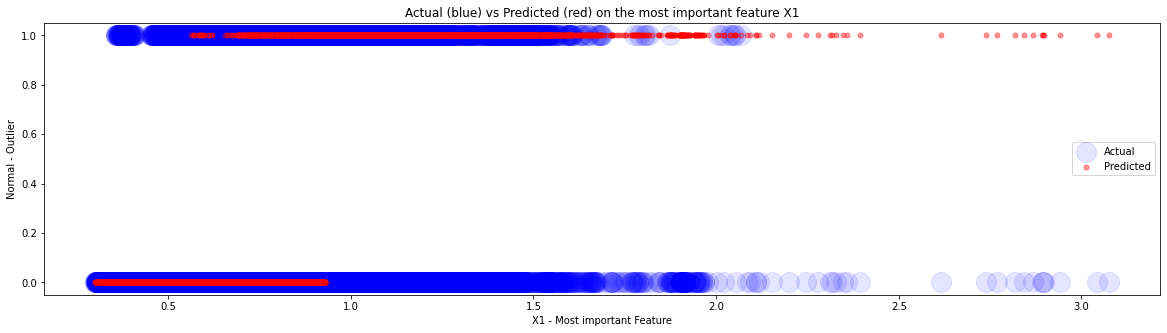

In [31]:
"""
The scatter plot shows the actual vs predicted data points for feature 'X1'
"""
fig = plt.figure(figsize=(20,5))
plt.scatter(X_test.iloc[:,0], Y_test, color="blue", marker='o', s=400 , alpha=0.1, label='Actual')
plt.scatter(X_test.iloc[:,0], predict_PCC, color="red", marker='.', s=100, alpha=0.4, label='Predicted')
plt.title("Actual (blue) vs Predicted (red) on the most important feature X1")
plt.xlabel("X1 - Most important Feature")
plt.ylabel("Normal - Outlier")
plt.legend()
plt.show()

This highly suggests that we need to tune out threshold in such a way that there is a balance between FP rate and Recall. We will discuss this approach later.

<h1>OBSERVATION: We can see that tradional approach is time-consuming, space consuming and is not capable of making a good model without tuning the threshold.</h1>
    
<p>============================================= END OF DOCUMENT ==================================================